# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The images we're working with are from the Food101 dataset. (101 classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However we've modified it to only use two classes (pizza and steak) using the image data modification notebook.

**Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.

In [17]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-07-03 13:27:17--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.117.207, 142.250.99.207, 142.250.107.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.117.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   265MB/s    in 0.4s    

2024-07-03 13:27:18 (265 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



## Inspect the data



In [18]:
!ls pizza_steak

test  train


In [19]:
!ls pizza_steak/train

pizza  steak


In [20]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [21]:
import os

# Walk thorugh pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [22]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

##To visualize our images, first let's get the class names programmatically.

In [23]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) #Created a list of class_names from the subdirectory.
print(class_names)

['pizza' 'steak']


In [24]:
#Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #Setup the target directory
  target_folder = target_dir +"/"+ target_class

  #Get a random image path
  random_image = random.sample(os.listdir(target_folder,),1)
  print(random_image)

  #Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") #Show the shape of the image

  return img

['2495903.jpg']
Image shape: (384, 512, 3)


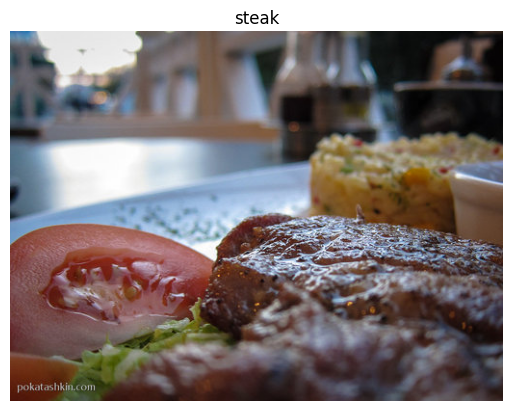

In [106]:
#View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train", target_class="steak")

In [26]:
img.dtype

dtype('uint8')

In [27]:
#The images we've imported and plotted are actually giant arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[162, 102,  52],
        [165, 105,  55],
        [169, 108,  61],
        ...,
        [179,  93,  70],
        [172,  95,  67],
        [170,  95,  66]],

       [[152,  90,  39],
        [155,  93,  42],
        [159,  99,  49],
        ...,
        [170,  82,  60],
        [167,  87,  60],
        [168,  91,  63]],

       [[146,  83,  30],
        [149,  86,  33],
        [152,  90,  39],
        ...,
        [160,  69,  48],
        [161,  80,  53],
        [166,  86,  59]],

       ...,

       [[174,  98,  46],
        [171,  95,  43],
        [169,  93,  41],
        ...,
        [162,  93,  38],
        [167,  98,  41],
        [173, 104,  47]],

       [[174,  98,  46],
        [169,  93,  41],
        [168,  92,  40],
        ...,
        [161,  92,  37],
        [165,  96,  39],
        [170, 101,  44]],

       [[173,  97,  45],
        [169,  93,  41],
        [168,  92,  40],
        ...,
        [161,  92,  3

In [28]:
img.shape

(512, 512, 3)

In [29]:
#Get all the pixel values between 0 & 1
img/255

array([[[0.63529412, 0.4       , 0.20392157],
        [0.64705882, 0.41176471, 0.21568627],
        [0.6627451 , 0.42352941, 0.23921569],
        ...,
        [0.70196078, 0.36470588, 0.2745098 ],
        [0.6745098 , 0.37254902, 0.2627451 ],
        [0.66666667, 0.37254902, 0.25882353]],

       [[0.59607843, 0.35294118, 0.15294118],
        [0.60784314, 0.36470588, 0.16470588],
        [0.62352941, 0.38823529, 0.19215686],
        ...,
        [0.66666667, 0.32156863, 0.23529412],
        [0.65490196, 0.34117647, 0.23529412],
        [0.65882353, 0.35686275, 0.24705882]],

       [[0.57254902, 0.3254902 , 0.11764706],
        [0.58431373, 0.3372549 , 0.12941176],
        [0.59607843, 0.35294118, 0.15294118],
        ...,
        [0.62745098, 0.27058824, 0.18823529],
        [0.63137255, 0.31372549, 0.20784314],
        [0.65098039, 0.3372549 , 0.23137255]],

       ...,

       [[0.68235294, 0.38431373, 0.18039216],
        [0.67058824, 0.37254902, 0.16862745],
        [0.6627451 , 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [30]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Setup paths to our directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               class_mode="binary",
                                               target_size = (224,224),
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed=42)

# Build a CNN model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size=3,
                           activation = tf.keras.activations.relu,
                           input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = "valid"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding = "valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation = tf.keras.activations.sigmoid)
])

# Compile our CNN
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        steps_per_epoch = len(train_data),
                        epochs = 5,
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 8s 145ms/step - loss: 0.5497 - accuracy: 0.7140 - val_loss: 0.4115 - val_accuracy: 0.8460
Epoch 2/5
47/47 [==============================] - 5s 114ms/step - loss: 0.4401 - accuracy: 0.8047 - val_loss: 0.4170 - val_accuracy: 0.8120
Epoch 3/5
47/47 [==============================] - 5s 114ms/step - loss: 0.4256 - accuracy: 0.8060 - val_loss: 0.3594 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 6s 123ms/step - loss: 0.3829 - accuracy: 0.8400 - val_loss: 0.3327 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 7s 142ms/step - loss: 0.3214 - accuracy: 0.8733 - val_loss: 0.3202 - val_accuracy: 0.8600


In [31]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

## Using the same model as before

Let's replicate the model we've built before for classifcation if it works with our image data.

In [32]:
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation = tf.keras.activations.sigmoid)

])

# Compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 113ms/step - loss: 0.9890 - accuracy: 0.5067 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 7s 148ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 111ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 134ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 111ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [33]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_5 (Dense)             (None, 4)                 602116    
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Despite having 20x more parameters than our CNN model_1, model_2 performs terribly. Let's try to improve it.

In [34]:
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid")
])

# Compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data ))

Epoch 1/5
47/47 [==============================] - 7s 107ms/step - loss: 1.8233 - accuracy: 0.6327 - val_loss: 1.1619 - val_accuracy: 0.5800
Epoch 2/5
47/47 [==============================] - 7s 142ms/step - loss: 1.0181 - accuracy: 0.6880 - val_loss: 1.3268 - val_accuracy: 0.6620
Epoch 3/5
47/47 [==============================] - 5s 106ms/step - loss: 0.6703 - accuracy: 0.7480 - val_loss: 0.8300 - val_accuracy: 0.6560
Epoch 4/5
47/47 [==============================] - 5s 114ms/step - loss: 0.5600 - accuracy: 0.7713 - val_loss: 0.4546 - val_accuracy: 0.7840
Epoch 5/5
47/47 [==============================] - 5s 110ms/step - loss: 0.4595 - accuracy: 0.8093 - val_loss: 0.6861 - val_accuracy: 0.7020


In [35]:
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 150528)            0         
                                                                 
 dense_8 (Dense)             (None, 100)               15052900  
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


['270687.jpg']
Image shape: (382, 512, 3)
['1055065.jpg']
Image shape: (384, 512, 3)


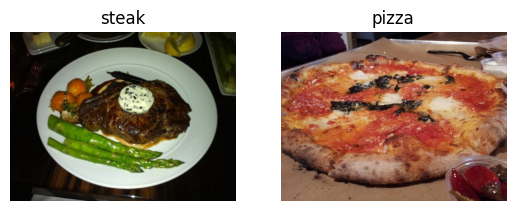

In [36]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/","pizza")

## Preprocess the data (prepare it for a model)

In [37]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than looking at 10,000 images at one time, a model might only look at 32 at a time.

It does this for couple of reasons:
1. 10.000 images (or more) migh not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.


In [38]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [39]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size = 32,
                                               class_mode = "binary",
                                               seed = 42,
                                               target_size = (224,224)
                                               )

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             batch_size = 32,
                                             target_size = (224,224),
                                             class_mode = "binary",
                                             seed = 42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [40]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [41]:
# How many batches are there?
len(train_data)

47

In [42]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.42352945, 0.43137258, 0.34509805],
          [0.3137255 , 0.32941177, 0.2392157 ],
          [0.26666668, 0.28235295, 0.18431373],
          ...,
          [0.42352945, 0.34509805, 0.3803922 ],
          [0.427451  , 0.34901962, 0.39607847],
          [0.45098042, 0.36862746, 0.427451  ]],
 
         [[0.2901961 , 0.30588236, 0.21568629],
          [0.45882356, 0.47450984, 0.37647063],
          [0.2627451 , 0.28627452, 0.18431373],
          ...,
          [0.39607847, 0.34117648, 0.34117648],
          [0.4156863 , 0.36862746, 0.38431376],
          [0.39607847, 0.34901962, 0.3647059 ]],
 
         [[0.3647059 , 0.40000004, 0.29411766],
          [0.38823533, 0.42352945, 0.31764707],
          [0.30588236, 0.34117648, 0.23529413],
          ...,
          [0.34509805, 0.3254902 , 0.30980393],
          [0.30980393, 0.29803923, 0.2784314 ],
          [0.3372549 , 0.3254902 , 0.30588236]],
 
         ...,
 
         [[0.5137255 , 0.5019608 , 0.54509807],
          [0.52156

In [43]:
# View the first batch of labels
labels

array([1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.],
      dtype=float32)

## Create a CNN model (start with a baseline)

In [44]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10, # filter is the number of the sliding windows going across an input (higher = more complex model)
                           kernel_size = 3, # the size of the sliding window going across an input
                           strides = 1, # the size of the step the sliding window takes across an input
                           padding = "valid", # if "same", output shape is same as input shape, if "valid", output shape is compressed.
                           activation = "relu",
                           input_shape = (224,224, 3)), # input layer (specify input shape)
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)
])

In [45]:
# Get a summary of our model
model_4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_10 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_5 (Flatten)         (None, 475240)            0         
                                                                 
 dense_12 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
# Compile the model
model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [47]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 129ms/step - loss: 2.2672 - accuracy: 0.6893 - val_loss: 0.4791 - val_accuracy: 0.7880
Epoch 2/5
47/47 [==============================] - 6s 131ms/step - loss: 0.4582 - accuracy: 0.8013 - val_loss: 0.3880 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 6s 118ms/step - loss: 0.4444 - accuracy: 0.8140 - val_loss: 0.4493 - val_accuracy: 0.7900
Epoch 4/5
47/47 [==============================] - 6s 132ms/step - loss: 0.3545 - accuracy: 0.8567 - val_loss: 0.3621 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 6s 132ms/step - loss: 0.2579 - accuracy: 0.9040 - val_loss: 0.3674 - val_accuracy: 0.8360


### Evaluating our model

It looks like our model is learning something, let's evaluate it.

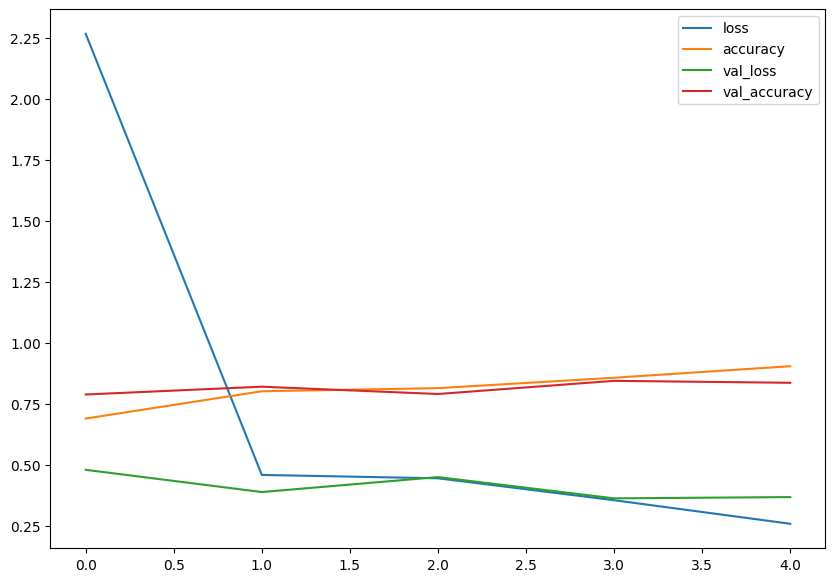

In [48]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize = (10,7));

In [49]:
# Plot the valiadtion and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  #how many epochs did we run for?
  epochs = range(len(history.history["loss"]))

  #Plot loss
  plt.plot(epochs, loss, label = "training loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = "accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

**Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** then training dataset. This means, it's learning the aptterns in the training dataset **too well** and thus the model's ability to generalize the unseen data will be diminshed.

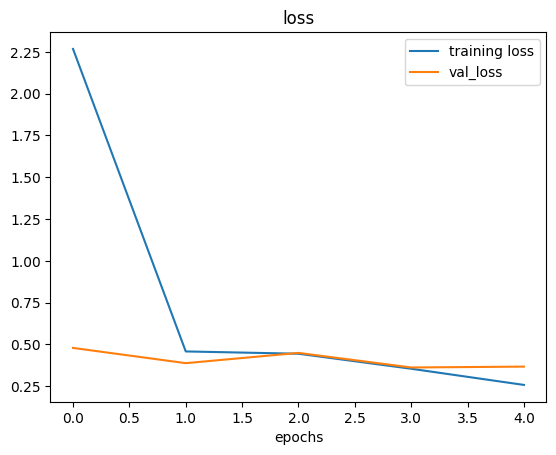

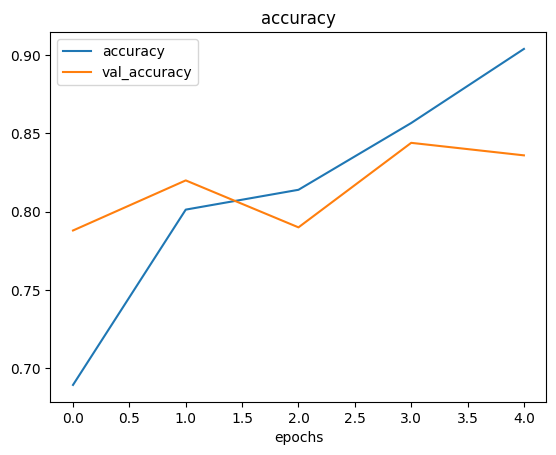

In [50]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

### Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

1. Create a baseline
2. Beat the baseline by overfitting a larger model
3. Reduce overfitting

Ways to induce overfitting:

* Increase the numbers of conv layers.
* Increase the number of conv filters.
* Add another dense layer to the output of our flattened layer.

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

**Note:** Reducing overfitting is also known as **regularization**.

In [51]:
# Create the model (this is going to be our new baseline)
model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,3,activation = tf.keras.activations.relu, input_shape = (224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Conv2D(10,3,activation = tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Conv2D(10,3,activation = tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)
])

In [52]:
# Compile the model
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [53]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 138ms/step - loss: 0.6411 - accuracy: 0.6173 - val_loss: 0.4983 - val_accuracy: 0.7640
Epoch 2/5
47/47 [==============================] - 5s 111ms/step - loss: 0.5087 - accuracy: 0.7653 - val_loss: 0.4999 - val_accuracy: 0.7280
Epoch 3/5
47/47 [==============================] - 6s 127ms/step - loss: 0.4565 - accuracy: 0.7880 - val_loss: 0.4223 - val_accuracy: 0.8180
Epoch 4/5
47/47 [==============================] - 5s 110ms/step - loss: 0.4275 - accuracy: 0.8073 - val_loss: 0.3696 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 6s 127ms/step - loss: 0.3963 - accuracy: 0.8187 - val_loss: 0.3854 - val_accuracy: 0.8280


In [54]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 26, 26, 10)       

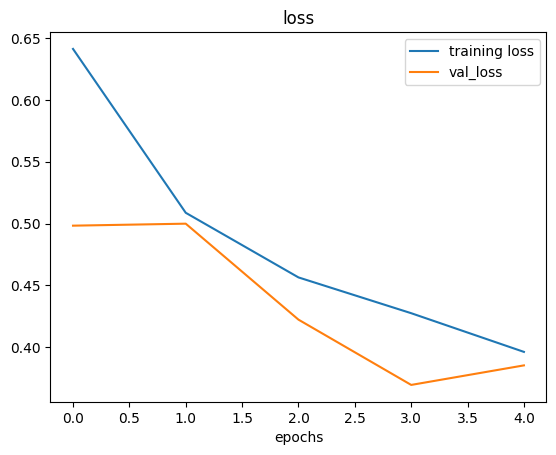

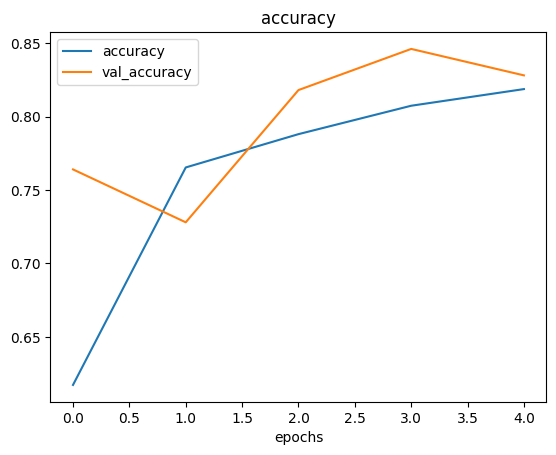

In [55]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [56]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                               zoom_range=0.2, # zoom in randomly on an image
                                               shear_range = 0.2, # how much do you want to shear an image?
                                               rotation_range = 0.2, # how much do you want to rotate an image?
                                               width_shift_range = 0.2, # move your image around on the x-axis
                                               height_shift_range = 0.3, # move your image around on the y-axis
                                               horizontal_flip = True) # do you want to flip an image?

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale = 1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale = 1/255.)

**Queastion:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

In [57]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224,224),
                                                                   batch_size = 32,
                                                                   class_mode = "binary",
                                                                   shuffle = True) # for demonstration purposes only

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               shuffle = False)

# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             batch_size = 32,
                                             target_size = (224,224),
                                             class_mode = "binary")

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


**Note:** Data augmentation is usually only performed on the training data. Using 'ImageDataGenerator' built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally, let's visualize some augmented data.

In [58]:
# Get sample augmented data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() #labels arenot augmented, only data(images)

Showing image number: 4


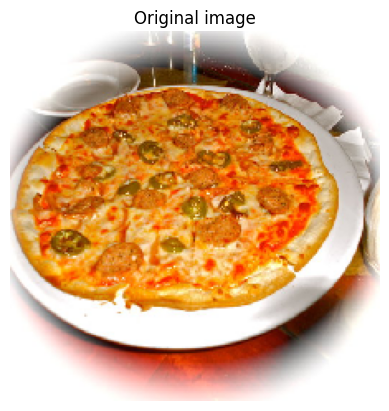

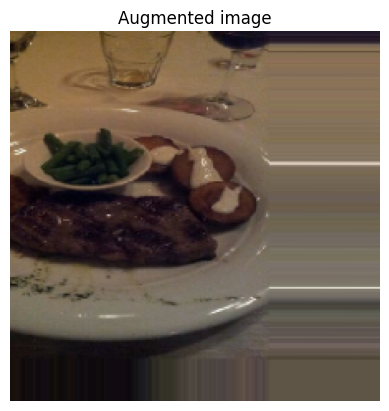

In [59]:
# Show original image and augmented image
import random
random_number = random.randint(0,32) # our batch sizes are 32
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title("Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented image")
plt.axis(False);

Now we've seen what augmented training data looks like, let's build a model and see how it learns on augmented data.

In [60]:
# Create a model (same as model_5)
model_6 = tf.keras.Sequential([
     tf.keras.layers.Conv2D(10,3,activation=tf.keras.activations.relu,input_shape=(224,224,3)),
     tf.keras.layers.MaxPool2D(pool_size = 2),
     tf.keras.layers.Conv2D(10,3,activation=tf.keras.activations.relu),
     tf.keras.layers.MaxPool2D(pool_size=2),
     tf.keras.layers.Conv2D(10,3,activation=tf.keras.activations.relu),
     tf.keras.layers.MaxPool2D(pool_size = 2),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])

In [61]:
# Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [62]:
# Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 443ms/step - loss: 0.6709 - accuracy: 0.5900 - val_loss: 0.5529 - val_accuracy: 0.6900
Epoch 2/5
47/47 [==============================] - 20s 417ms/step - loss: 0.5773 - accuracy: 0.6933 - val_loss: 0.4920 - val_accuracy: 0.7460
Epoch 3/5
47/47 [==============================] - 21s 439ms/step - loss: 0.5137 - accuracy: 0.7680 - val_loss: 0.4165 - val_accuracy: 0.8100
Epoch 4/5
47/47 [==============================] - 20s 421ms/step - loss: 0.4918 - accuracy: 0.7700 - val_loss: 0.4001 - val_accuracy: 0.8200
Epoch 5/5
47/47 [==============================] - 20s 427ms/step - loss: 0.4741 - accuracy: 0.7807 - val_loss: 0.3232 - val_accuracy: 0.8740


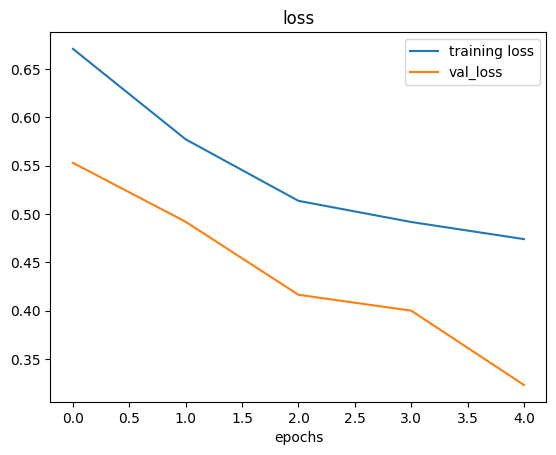

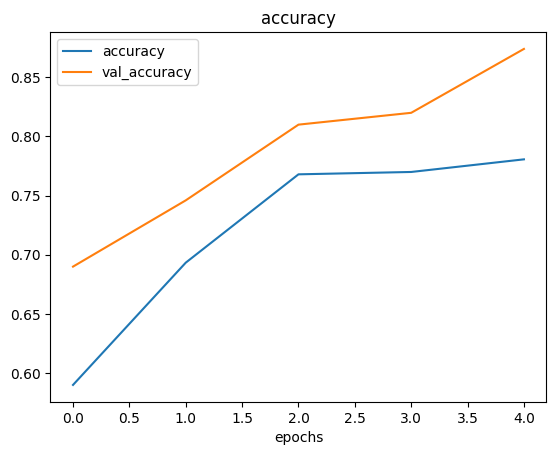

In [63]:
# Check our model's training curves
plot_loss_curves(history_6)

**Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza&steak at the same time instead of just pizza then steak)

### Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of layers (e.g. add more 'Conv2D' / 'MaxPool2D' layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case.

## Making a prediction with our trained model on our own custom data

In [64]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


In [65]:
#View oru example image
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")

--2024-07-03 13:32:40--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.04s   

2024-07-03 13:32:40 (53.5 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



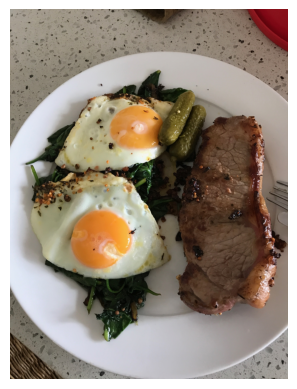

In [66]:
plt.imshow(steak)
plt.axis(False);

In [67]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

**Note:** When you train a neural network and you want to make a prediction with it on your own custom data, it's important that your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [68]:
# Create a function to import and image and resize it to be able to be used with our trained model
def load_and_prep_image(filename, img_shape = 224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it to (img_shape,img_shape,colour_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size = [img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [69]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 111],
        [142, 121, 100],
        [101,  80,  59],
        ...,
        [164, 155, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  96],
        [138, 118,  94],
        [106,  85,  64],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 126, 102],
        [148, 128, 103],
        [114,  93,  72],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [143, 132, 126]]

In [70]:
expanded_steak = tf.expand_dims(steak,axis=0)

In [71]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [72]:
pred = model_6.predict(tf.expand_dims(steak, axis=0))
pred

1/1 [==============================] - 0s 283ms/step


array([[0.80882686]], dtype=float32)

In [73]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [74]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [75]:
def pred_and_plot(model,filename,class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis = 0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 24ms/step


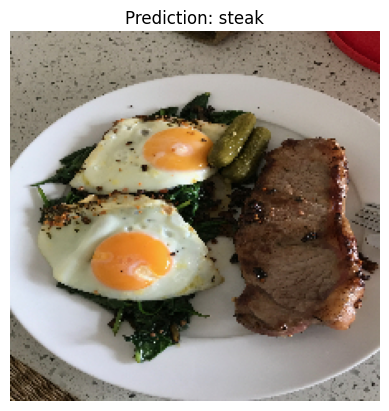

In [76]:
# Test our model on a custom image
pred_and_plot(model_6, "03-steak.jpeg")

## Multi-class Image Classification

We've just been through a bunch of the following steps with binary classification problem (pizza vs. steak), now we're going to step things up a notch with 10 classes of food (multi-class classification).

1. Become one with the data
2. Preprocess the data (get it ready for the model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied



## Import and become one with the data

In [77]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2024-07-03 13:32:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.207, 173.194.203.207, 74.125.199.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   224MB/s    in 2.2s    

2024-07-03 13:32:46 (224 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [78]:
import os
# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '10_food_classes_all_data'
There are 10 directories and 0 images in '10_food_classes_all_data/test'
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'
There are 10 directori

In [79]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [80]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['518018.jpg']
Image shape: (512, 512, 3)


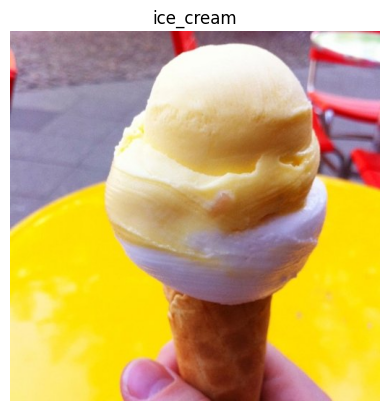

In [81]:
import random
img = view_random_image(target_dir  = train_dir, target_class = random.choice(class_names))

### Preprocess the data (prepare the data for a model)

In [82]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "categorical",
                                               shuffle = True)

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             batch_size = 32,
                                             class_mode = "categorical",
                                             target_size = (224,224),
                                             shuffle = True)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### Create a model (start with a baseline)

In [83]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model
model_7 = Sequential([
    Conv2D(10,3,input_shape = (224,224,3)),
    Activation(activation="relu"),
    Conv2D(10,3, activation = "relu"),
    MaxPool2D(pool_size = 2),
    Conv2D(10,3, activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size = 2),
    Flatten(),
    Dense(10,activation = "softmax")
])

# Compile the model
model_7.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])


In [84]:
# Fit the model
history_7 = model_7.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 31s 119ms/step - loss: 2.1460 - accuracy: 0.2140 - val_loss: 2.0587 - val_accuracy: 0.2600
Epoch 2/5
235/235 [==============================] - 28s 118ms/step - loss: 1.8540 - accuracy: 0.3653 - val_loss: 1.9190 - val_accuracy: 0.3336
Epoch 3/5
235/235 [==============================] - 28s 120ms/step - loss: 1.4049 - accuracy: 0.5448 - val_loss: 2.0207 - val_accuracy: 0.3404
Epoch 4/5
235/235 [==============================] - 29s 124ms/step - loss: 0.7393 - accuracy: 0.7625 - val_loss: 2.6787 - val_accuracy: 0.2956
Epoch 5/5
235/235 [==============================] - 28s 118ms/step - loss: 0.2512 - accuracy: 0.9257 - val_loss: 3.6849 - val_accuracy: 0.2936


  ### Evaluate the model

In [85]:
# Evaluate on the test data
model_7.evaluate(test_data)

79/79 [==============================] - 7s 90ms/step - loss: 3.6849 - accuracy: 0.2936


[3.684943675994873, 0.2935999929904938]

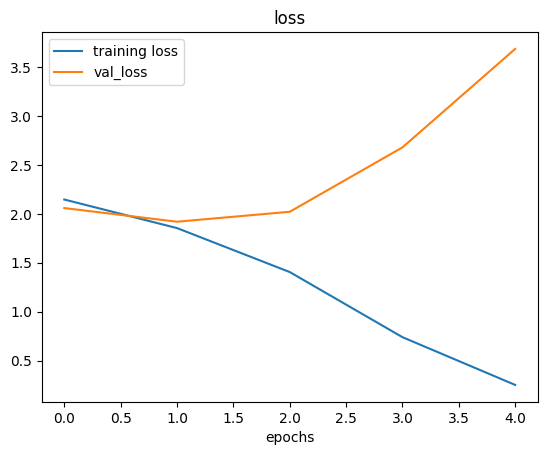

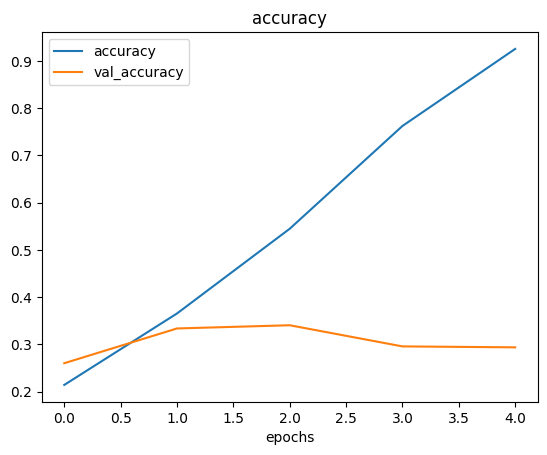

In [86]:
# Check out the model's loss curves on the 10 classes
plot_loss_curves(history_7)

What do these loss curves tell us?

It seems our model is **overfitting** the training set quite badly, in other words it's getting great results on the training data but fails to generealize well to unseen data and performs poorly on the test dataset.

### Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

To prevent overfitting:

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns.
* **Simplify the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce number of layers or reduce number of hidden units in layers.
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add diversity on it (without altering the original data).
* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those on your own dataset.

In [87]:
# How about we try and simplify the model first?
# Let's try to remove the convolutional layers

model_8 = Sequential([
  Conv2D(10,3,activation="relu",input_shape = (224,224,3)),
  MaxPool2D(pool_size = 2),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(pool_size = 2),
  Flatten(),
  Dense(10, activation="softmax")
])

# Compile the model
model_8.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [88]:
#Fit the model
history_8 = model_8.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 31s 128ms/step - loss: 2.1231 - accuracy: 0.2495 - val_loss: 1.9720 - val_accuracy: 0.2812
Epoch 2/5
235/235 [==============================] - 31s 131ms/step - loss: 1.8044 - accuracy: 0.3860 - val_loss: 1.8892 - val_accuracy: 0.3456
Epoch 3/5
235/235 [==============================] - 27s 114ms/step - loss: 1.4723 - accuracy: 0.5093 - val_loss: 1.8871 - val_accuracy: 0.3524
Epoch 4/5
235/235 [==============================] - 27s 114ms/step - loss: 1.0414 - accuracy: 0.6695 - val_loss: 2.0807 - val_accuracy: 0.3564
Epoch 5/5
235/235 [==============================] - 27s 116ms/step - loss: 0.6215 - accuracy: 0.8192 - val_loss: 2.5644 - val_accuracy: 0.3264


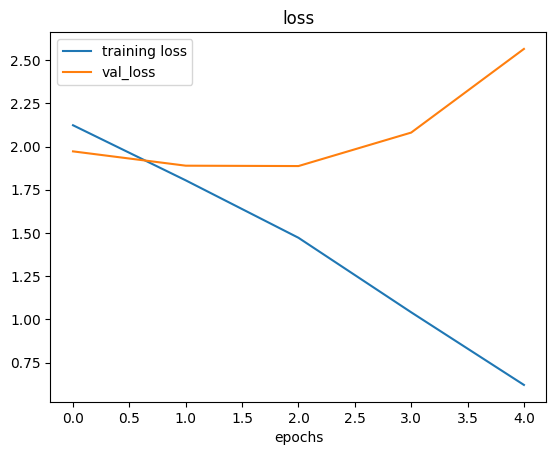

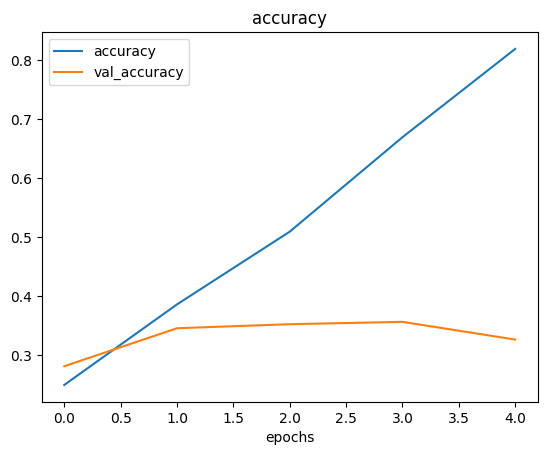

In [89]:
plot_loss_curves(history_8)

Looks like our "simplifying the model" experiment didn't work. The accuracy went down and overfitting continued.

How about we try data augmentation?

### Trying to reduce overfitting with data augmentation

Let's try and improve oru model's results by using augmented data.

Ideally, we want to:
* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy

In [90]:
# Create an augmented data genereator instance
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             zoom_range = 0.2,
                                             rotation_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1/255.)

In [91]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224,224),
                                                                   batch_size = 32,
                                                                   shuffle = True,
                                                                   class_mode = "categorical",)

test_data = test_datagen.flow_from_directory(test_dir,
                                             batch_size = 32,
                                             class_mode = "categorical",
                                             target_size = (224,224),
                                             shuffle = True)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [92]:
# Create another model but this time we'll fit it on the augmented training data of 10 classes.
model_9 = tf.keras.models.clone_model(model_7)

# Compile the cloned model
model_9.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [93]:
model_9.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_18 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_20 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

In [94]:
# Fit the model
history_9 = model_9.fit(train_data_augmented,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 105s 434ms/step - loss: 2.2170 - accuracy: 0.1703 - val_loss: 2.0542 - val_accuracy: 0.2388
Epoch 2/5
235/235 [==============================] - 107s 457ms/step - loss: 2.1022 - accuracy: 0.2340 - val_loss: 2.0019 - val_accuracy: 0.2896
Epoch 3/5
235/235 [==============================] - 103s 441ms/step - loss: 2.0363 - accuracy: 0.2752 - val_loss: 1.9297 - val_accuracy: 0.3048
Epoch 4/5
235/235 [==============================] - 107s 454ms/step - loss: 1.9943 - accuracy: 0.2989 - val_loss: 1.8725 - val_accuracy: 0.3416
Epoch 5/5
235/235 [==============================] - 104s 442ms/step - loss: 1.9326 - accuracy: 0.3300 - val_loss: 1.8258 - val_accuracy: 0.3716


In [95]:
model_7.evaluate(test_data)

79/79 [==============================] - 7s 88ms/step - loss: 3.6849 - accuracy: 0.2936


[3.6849446296691895, 0.2935999929904938]

In [96]:
model_9.evaluate(test_data)

79/79 [==============================] - 7s 83ms/step - loss: 1.8258 - accuracy: 0.3716


[1.8257713317871094, 0.3716000020503998]

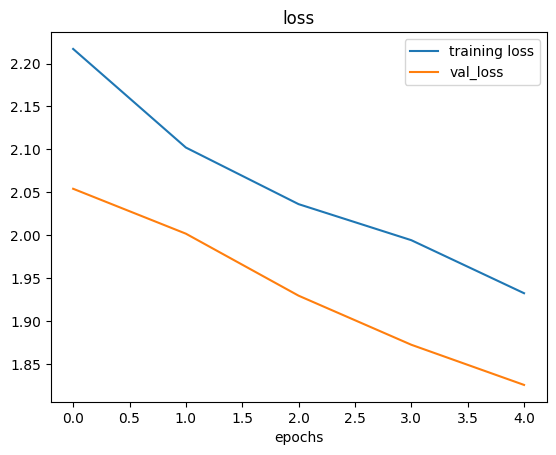

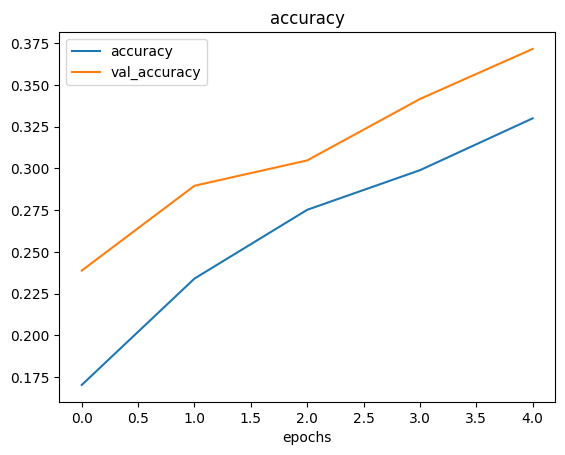

In [97]:
plot_loss_curves(history_9)

That looks muche better, the loss curves are much closer to eachother than the baseline model and they look like they're heading in the right direction (certainly not the wrong direction) so if we were to train longer, we might see further improvements.

### Repeat until satisfied

We could keep going here and continually trying to bring our loss curves closer together and trying to improve the validation/test accuracy by running lots of experiments, namely:

- restructuring our model's architecture  (increasing layers/hidden units)
- adjust learning rate
- try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
- training for longer (e.g. 10 epochs instead of 5 epochs)
- try **transfer learning**

### Making a prediction with our trained model

In [98]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [99]:
# Download some custom images
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-hamburger.jpeg
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-sushi.jpeg
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg

--2024-07-03 13:48:26--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-hamburger.jpeg
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg       [ <=>                ] 268.64K  --.-KB/s    in 0.03s   

2024-07-03 13:48:27 (8.37 MB/s) - ‘03-hamburger.jpeg’ saved [275091]

--2024-07-03 13:48:27--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-sushi.jpeg
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘03-sushi.jpeg’

03-sushi.jpeg           [ <=>                ] 268.41K  --.-KB/s    in 0.02s   

2024-07-03 13:48:27 (11.2 MB/s) - ‘03-sushi.jpeg’ saved [274851]

--2024-07-03 13:48:2

In [100]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model,filename,class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis = 0))

  # Add in logic for multi-class
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 216ms/step


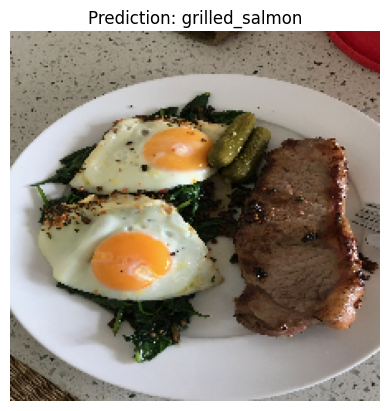

In [101]:
# Make a prediction using model_9
pred_and_plot(model_9,"03-steak.jpeg",class_names)

In [102]:
# Save a model
model_9.save("saved_trained_model_9")